In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans#聚类库
from sklearn.decomposition import PCA#降维
from sklearn.metrics import silhouette_score#轮廓系数
import matplotlib.pyplot as plt

In [2]:
#1.导入数据集
data = load_iris().data

In [3]:
#2.使用k-means
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(data)#聚类结果

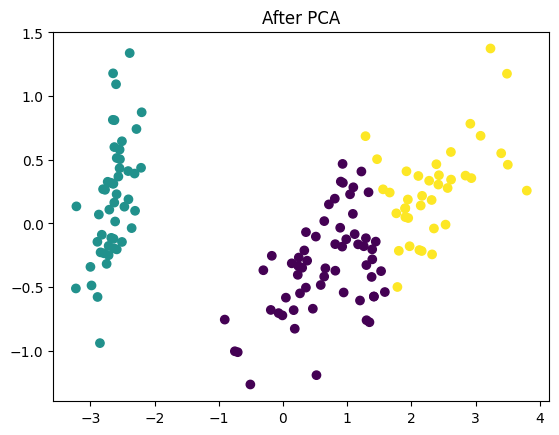

In [4]:
#3.PCA降维
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters)
plt.title("After PCA")
plt.show()

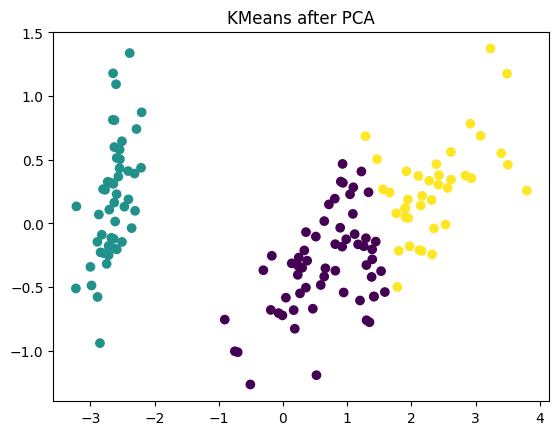

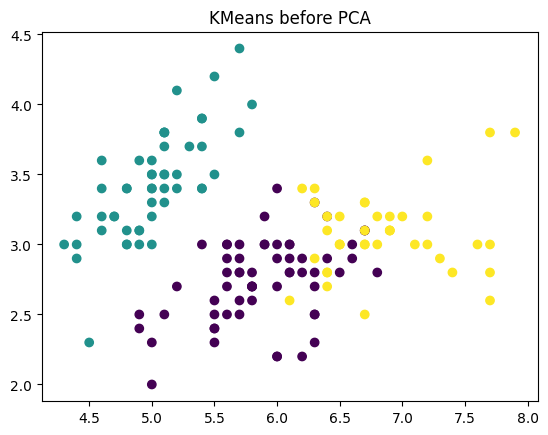

In [5]:
#4.先降维，再聚类
pca_kmeans = KMeans(n_clusters=3, random_state=0).fit_predict(data_pca)#用降维数据进行训练
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=pca_kmeans)
plt.title("KMeans after PCA")
plt.show()
#原数据的聚类
plt.scatter(data[:, 0], data[:, 1], c=clusters)
plt.title("KMeans before PCA")
plt.show()
##可见在此次PCA降维后数据结果并未改变，数据的可视化效果更好且计算效率变高

In [6]:
#5.轮廓系数做比较
silhouette_avg = silhouette_score(data, clusters)
print(f'KMeans before PCA: {silhouette_avg}')

silhouette_avg_pca = silhouette_score(data_pca, pca_kmeans)
print(f'KMeans after PCA: {silhouette_avg_pca}')
#可见降维后聚类效果稍微变好

KMeans before PCA: 0.5511916046195917
KMeans after PCA: 0.5976764219547991


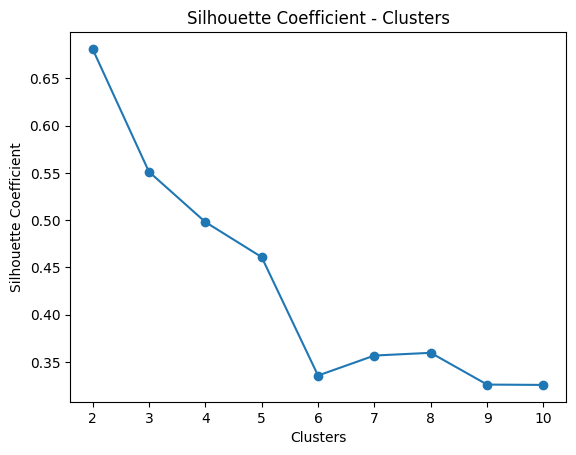

In [7]:
#6.绘制关系图
silhouette = []
for n_clusters in range(2, 11):
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    silhouette.append(silhouette_avg)

plt.plot([i for i in range(2,11)], silhouette, marker='o')
plt.title("Silhouette Coefficient - Clusters")
plt.xlabel('Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()
#可见当簇为2时轮廓系数最大，聚类效果最好